In [43]:
#0
import pandas
from pandas import *
data2 = read_csv("/Users/ethanschultz/Documents/GSB 544/Data Files/avocado-updated-2020.csv")
#1
data2.rename(columns = {"4046":"small_hass"}, inplace = True)
data2.rename(columns = {"4225":"large_hass"}, inplace = True)
data2.rename(columns = {"4770":"extra_large_hass"}, inplace = True)
#data2

#2
This data set has information about avocados from various years and dates within those years. It containts variables like price, the dtae of the observation, volume, the size of the avocados, the size of bags of avocados, whether or not the avocados were organic or not, and the geography of where the avocados came from.

In [2]:
geographys = data2['geography'].unique()
geographys
mapping_dict = {
    'Albany': 'Northeast', 'Baltimore/Washington': 'Northeast', 'Buffalo/Rochester': 'Northeast',
    'Hartford/Springfield': 'Northeast', 'New York': 'Northeast', 'Northern New England': 'Northeast',
    'Northeast': 'Northeast', 'Philadelphia': 'Northeast', 'Pittsburgh': 'Northeast', 'Syracuse': 'Northeast',
    'Atlanta': 'Southeast', 'Charlotte': 'Southeast', 'Jacksonville': 'Southeast',
    'Miami/Ft. Lauderdale': 'Southeast', 'Nashville': 'Southeast', 'Orlando': 'Southeast',
    'Raleigh/Greensboro': 'Southeast', 'Richmond/Norfolk': 'Southeast', 'Roanoke': 'Southeast',
    'South Carolina': 'Southeast', 'Southeast': 'Southeast', 'Tampa': 'Southeast',
    'Chicago': 'Midwest', 'Cincinnati/Dayton': 'Midwest', 'Columbus': 'Midwest', 'Detroit': 'Midwest',
    'Grand Rapids': 'Midwest', 'Great Lakes': 'Midwest', 'Indianapolis': 'Midwest',
    'Louisville': 'Midwest', 'Plains': 'Midwest', 'St. Louis': 'Midwest',
    'Dallas/Ft. Worth': 'Southwest & South Central', 'Houston': 'Southwest & South Central',
    'Las Vegas': 'Southwest & South Central', 'Midsouth': 'Southwest & South Central',
    'New Orleans/Mobile': 'Southwest & South Central', 'Phoenix/Tucson': 'Southwest & South Central',
    'South Central': 'Southwest & South Central', 'West Tex/New Mexico': 'Southwest & South Central',
    'Boise': 'West', 'California': 'West', 'Denver': 'West', 'Los Angeles': 'West',
    'Sacramento': 'West', 'San Diego': 'West', 'San Francisco': 'West',
    'Seattle': 'West', 'Spokane': 'West', 'Portland': 'West', 'West': 'West'
}

# Create new 'regions' column using .map()
data2['regions'] = data2['geography'].map(mapping_dict).fillna('Other')
#data2


,date,average_price,total_volume,small_hass,large_hass,extra_large_hass,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,regions
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,Northeast
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,Northeast
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,Southeast
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,Southeast
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,Other
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,Southwest & South Central


In [3]:
#3
year2017 = data2[(data2['year'] == 2017) & (data2['type'] == 'organic')]
small_hass = year2017.groupby('regions')['small_hass'].sum().reset_index()
small_hass


,regions,small_hass
0,Midwest,514326.90
1,Northeast,1825608.12
2,Other,6907812.62
3,Southeast,545334.81
4,Southwest & South Central,3165756.05
5,West,5446464.04


We can see that the west sold the most total organic small hass avocados in 2017

In [3]:
#4
data2['date'] = to_datetime(data2['date'])
data2['year'] = data2['date'].dt.year
data2['month'] = data2['date'].dt.month
data2['day'] = data2['date'].dt.day
data2.groupby('month').mean('total_volume')

,average_price,total_volume,small_hass,large_hass,extra_large_hass,total_bags,small_bags,large_bags,xlarge_bags,year,day
month,,,,,,,,,,,
1,1.287596,9.853122e+05,308693.058179,312853.505905,22480.002184,341278.942956,234641.787819,101886.862623,4750.292514,2017.444444,15.518519
2,1.248885,1.095374e+06,356108.726586,329465.377199,27114.248681,382679.807581,257941.593086,118359.108364,6379.106130,2017.500000,14.166667
3,1.316207,9.957150e+05,319500.287778,280341.474979,22722.835312,373146.523045,257800.970532,109003.142239,6342.410274,2017.555556,15.592593
4,1.374765,1.016582e+06,328330.040096,288992.924466,23387.748900,375867.780659,263520.526179,104816.774014,7530.478686,2017.500000,15.500000
5,1.362226,1.123632e+06,365450.569945,322915.208484,24807.403755,410266.976481,282949.842977,118736.179386,8580.955833,2017.444444,16.407407
6,1.403636,1.051247e+06,333553.366679,292529.670089,25541.020170,398948.428058,274579.395827,112721.230545,11647.804281,2017.560415,15.755745
7,1.457877,9.832681e+05,299886.604012,286913.961481,24286.230278,372170.486228,259734.473515,101153.085415,11282.926612,2017.444444,16.074074
8,1.470107,9.499249e+05,293459.626250,268170.179452,20111.723497,368181.512073,254275.793565,104320.211189,9585.506962,2017.500000,16.000000
9,1.485673,9.064773e+05,272419.824619,258556.891759,17596.858949,357901.622625,246234.611004,104358.588974,7308.422646,2017.576923,15.346154


May produces the highest average volume for avocados

In [4]:
#5
import numpy
from numpy import *
#makes a variable with all regions we are not interested in for metro
region = ['Northeast', 'Southeast','Midwest','Southwest & South Central', 'West','South Central','Plains','Great Lakes','Total U.S.', 'Midsouth' ]
#In a new column assigns non-metro to matching values for region and geography else gives it metro
data2['area'] = where(data2['geography'].isin(region), 'Non_metro','Metro')
#Filters the data to only have metro regions
metro_regions = data2[data2['area'] == 'Metro']
#groups the data by geographies and sums the total volume while sorting them from largest to smallest
metro_regions.groupby('geography').sum('total_volume').sort_values(by='total_volume', ascending = False)
metro_average = metro_regions.groupby('geography').mean('total_volume').sort_values(by='total_volume', ascending = False)
metro_averagetop5 = ['Los Angeles','New York', 'Dallas/Ft. Worth','Houston','Phoenix/Tucson']
#filter the original dataset to only have the 5 metro regions above
top5_metro = data2[data2['geography'].isin(metro_averagetop5)]
#metro_average	



,average_price,total_volume,small_hass,large_hass,extra_large_hass,total_bags,small_bags,large_bags,xlarge_bags,year,month,day
geography,,,,,,,,,,,,
California,1.445915,3.254719e+06,1.109099e+06,937281.344428,89021.415474,1.119318e+06,860409.791961,200993.142908,57914.611160,2017.460784,6.372549,15.529412
Los Angeles,1.311013,1.567566e+06,5.936972e+05,232323.264608,48539.839412,6.930059e+05,555156.720376,96552.233056,41296.893235,2017.460784,6.372549,15.529412
New York,1.659477,8.631458e+05,2.966018e+04,545481.112778,5713.390948,2.822735e+05,231466.437288,49336.938758,1470.095327,2017.460784,6.372549,15.529412
Dallas/Ft. Worth,1.076160,7.127519e+05,3.295946e+05,127929.248807,10748.742026,2.444793e+05,179586.615458,63310.788725,1581.920507,2017.460784,6.372549,15.529412
Houston,1.075752,6.876533e+05,3.009210e+05,126765.890033,11506.757843,2.484597e+05,141024.887827,104715.842598,2718.957026,2017.460784,6.372549,15.529412
Phoenix/Tucson,1.209297,6.250383e+05,2.939647e+05,120200.269853,5727.927516,2.051419e+05,94151.706013,110134.888873,855.306127,2017.460784,6.372549,15.529412
West Tex/New Mexico,1.252972,4.607743e+05,2.283463e+05,61954.106995,15811.134319,1.546628e+05,93258.268259,60192.368276,1212.161691,2017.466338,6.364532,15.525452
Denver,1.263088,4.541332e+05,8.573295e+04,121461.745474,7062.816944,2.398757e+05,86772.134575,151149.557990,1954.017974,2017.460784,6.372549,15.529412
Baltimore/Washington,1.474820,4.522298e+05,4.639739e+04,242720.117974,8564.812124,1.545475e+05,123339.006029,29665.037827,1543.432386,2017.460784,6.372549,15.529412


We can see that the metro regions that sold the most total avocados are Los Angeles, New York, Dallas/Ft. Worth, Houston, and Pheonix/Tuscon.

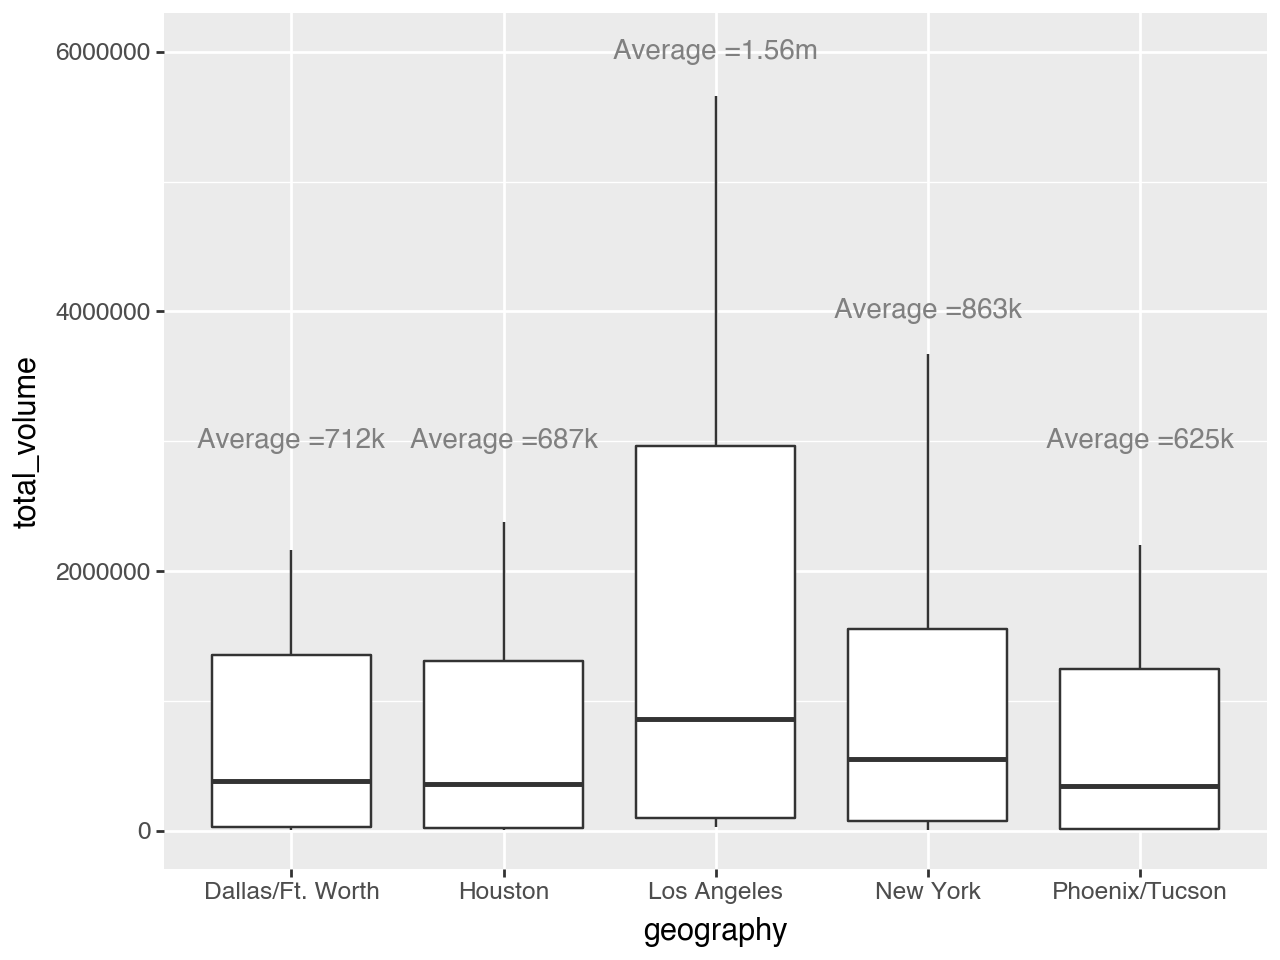

In [5]:
import plotnine
from plotnine import *
(ggplot(top5_metro, aes("geography", "total_volume")) 
    + geom_boxplot()
    + annotate('text', x=1, y=3000000, label=str('Average =712k'), size=10, color="gray")
    + annotate('text', x=2, y=3000000, label=str('Average =687k'), size=10, color="gray")
    + annotate('text', x=3, y=6000000, label=str('Average =1.56m'), size=10, color="gray")
    + annotate('text', x=4, y=4000000, label=str('Average =863k'), size=10, color="gray")
    + annotate('text', x=5, y=3000000, label=str('Average =625k'), size=10, color="gray")

)

In [6]:
#6
cali = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']
filt_cali = data2[data2['geography'].isin(cali)]
filt_cali
wide_cali = filt_cali.pivot_table(index = "geography", columns= "type", values = "average_price", aggfunc='mean')
wide_cali['differece'] = wide_cali['organic'] - wide_cali['conventional']
wide_cali

type,conventional,organic,differece
geography,,,
Los Angeles,1.047124,1.574902,0.527778
Sacramento,1.295359,1.873856,0.578497
San Diego,1.113856,1.798366,0.684510
San Francisco,1.400490,2.119444,0.718954


We see that San Francisco has the greatest differnce between organic and conventional at an average of 0.719 higher for organic. The table shows the average of organic and conventional for each California city and the difference.

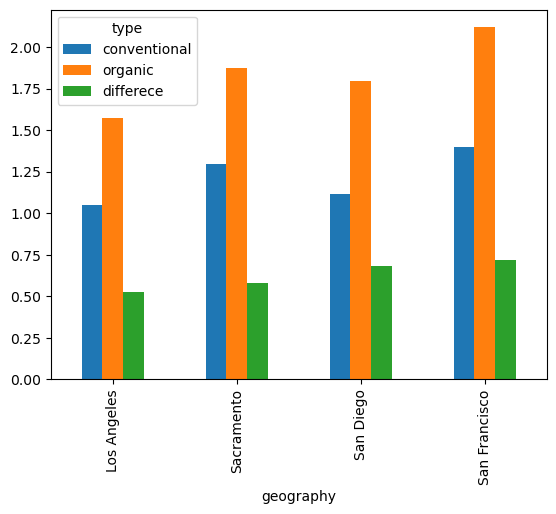

In [7]:

import matplotlib.pyplot as plt
plot = wide_cali.plot(kind='bar')
plt.show()

In [8]:
filt_cali
long_cali = filt_cali.melt(
    id_vars=['geography','total_volume','type',], 
    value_vars=['total_volume','small_hass','large_hass','extra_large_hass'],
    var_name='hass type',
    value_name='sales')
#long_cali

,geography,total_volume,type,hass type,sales
0,Los Angeles,2682159.95,conventional,small_hass,1837999.65
1,Los Angeles,54495.54,organic,small_hass,47721.51
2,Sacramento,430138.88,conventional,small_hass,110693.69
3,Sacramento,9213.49,organic,small_hass,3727.52
4,San Diego,461607.33,conventional,small_hass,244152.26
...,...,...,...,...,...
7339,Sacramento,23531.38,organic,extra_large_hass,0.00
7340,San Diego,469356.72,conventional,extra_large_hass,7210.47
7341,San Diego,25799.95,organic,extra_large_hass,0.00
7342,San Francisco,644141.37,conventional,extra_large_hass,5597.21


In [9]:
#makes a new dataset with the totals for sales goruped by region and the type of avocado and retians the sales as the same column
overall_volume = long_cali.groupby(['geography', 'type'])['sales'].transform('sum')
#calculated the percent of each area byt dividing it from the totals from the overall_volume
long_cali['percent'] = long_cali['sales'] / overall_volume
#long_cali

,geography,total_volume,type,hass type,sales,percent
0,Los Angeles,2682159.95,conventional,small_hass,1837999.65,0.003505
1,Los Angeles,54495.54,organic,small_hass,47721.51,0.004424
2,Sacramento,430138.88,conventional,small_hass,110693.69,0.000926
3,Sacramento,9213.49,organic,small_hass,3727.52,0.001718
4,San Diego,461607.33,conventional,small_hass,244152.26,0.002479
...,...,...,...,...,...,...
7339,Sacramento,23531.38,organic,extra_large_hass,0.00,0.000000
7340,San Diego,469356.72,conventional,extra_large_hass,7210.47,0.000073
7341,San Diego,25799.95,organic,extra_large_hass,0.00,0.000000
7342,San Francisco,644141.37,conventional,extra_large_hass,5597.21,0.000027


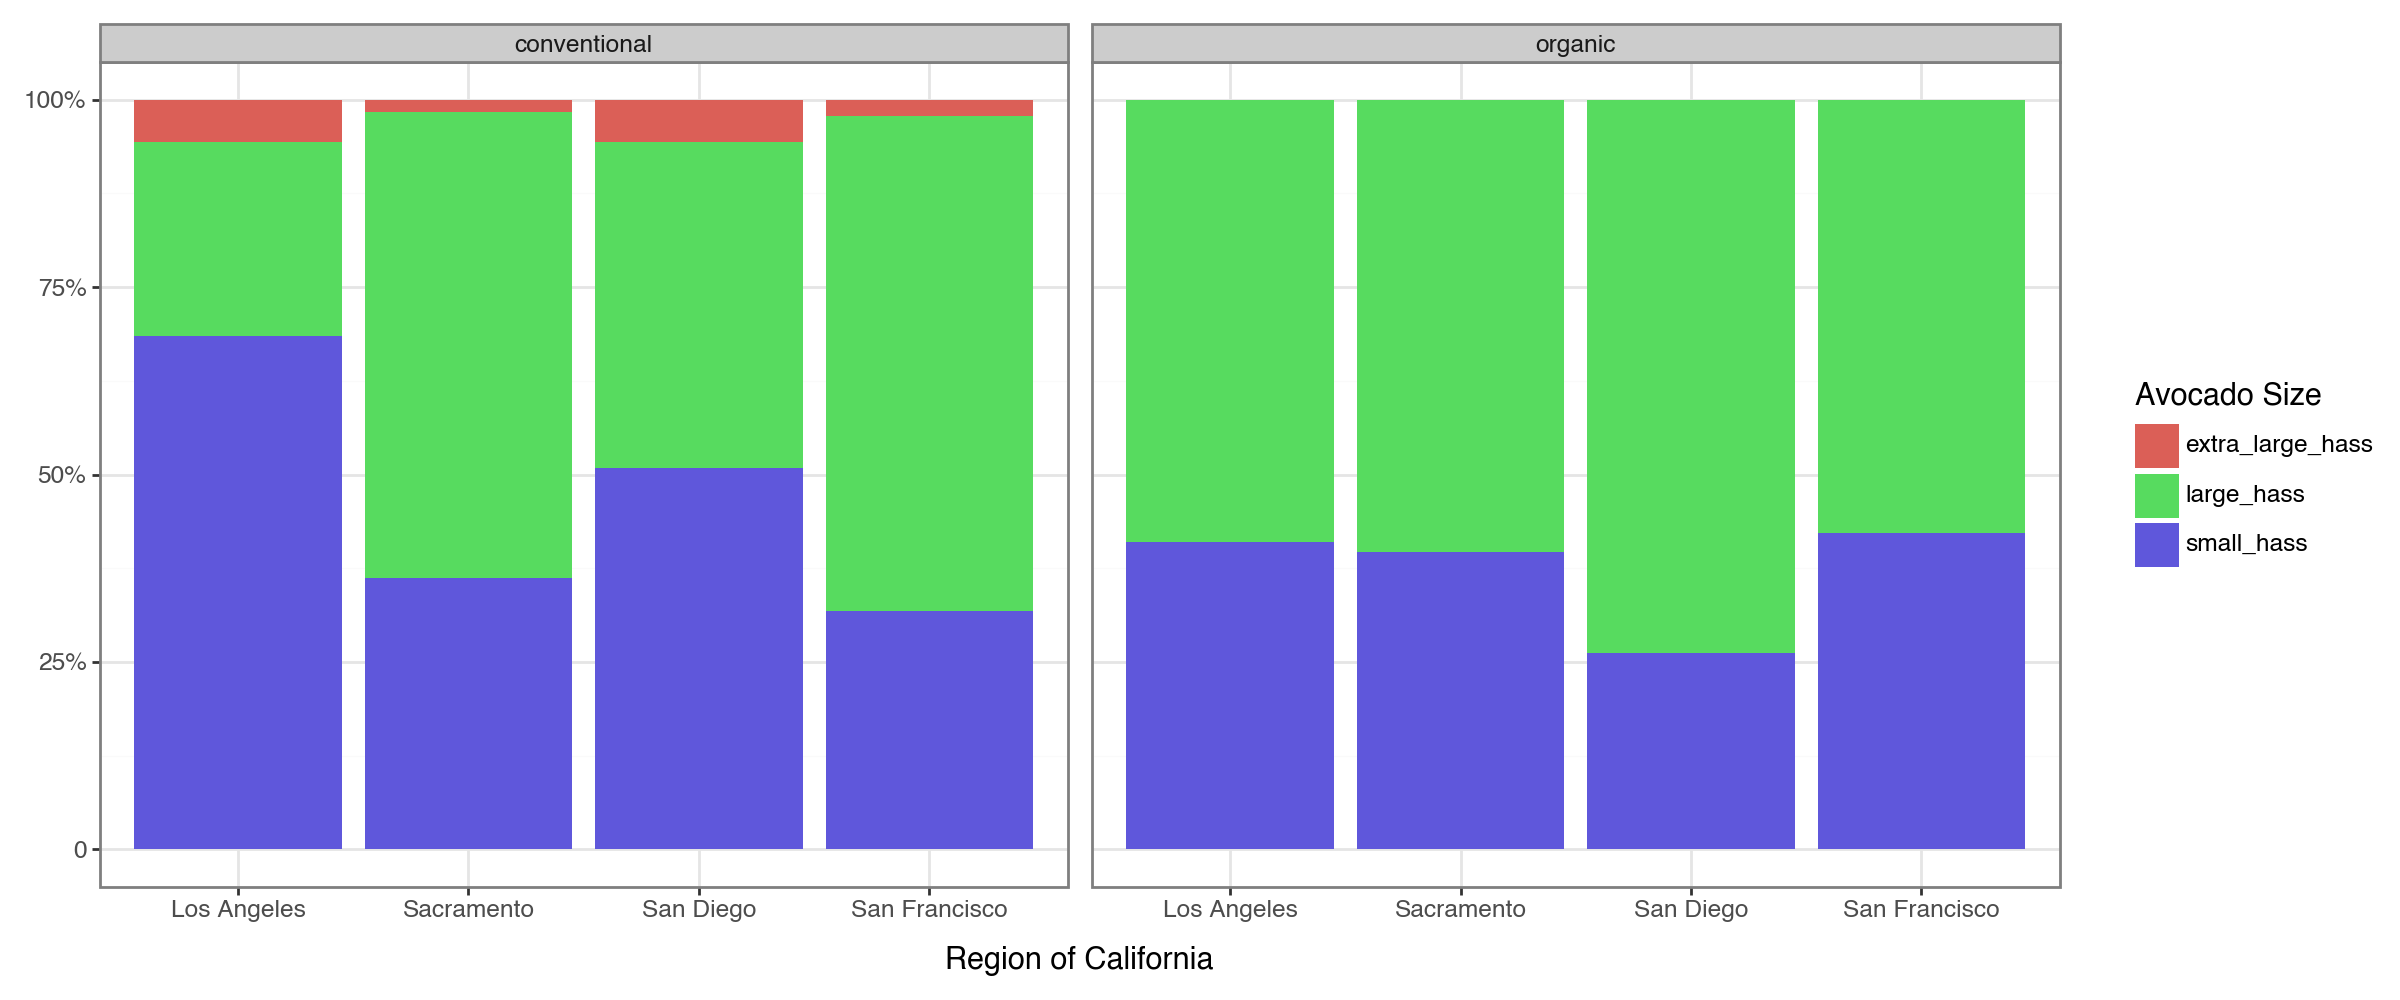

In [10]:

(ggplot(long_cali, aes(x='geography', y = 'percent', fill = 'hass type')) +
     theme_bw() +
     facet_wrap('type') +
     geom_bar(stat = 'identity') +
     scale_y_continuous(breaks = [0,0.25,0.5,0.75,1], labels = ['0', '25%', '50%', '75%', '100%']) +
     labs(x = 'Region of California', fill = 'Avocado Size', y = False) +
     theme(figure_size = (12,5))
)

In [37]:
import numpy as np
import pandas as pd

# Define cities and their corresponding house price ranges
city_data = {
    'San Diego': {'min_price': 400000, 'max_price': 600000},
    'San Francisco': {'min_price': 1000000, 'max_price': 1400000},
    'Los Angeles': {'min_price': 700000, 'max_price': 900000},
    'Sacramento': {'min_price': 250000, 'max_price': 400000}
}

# Create an empty list to hold the data
housing_data = []

# Generate random house prices for each city
for geography, price_range in city_data.items():
    # Generate 50 random prices within the specified range for each city
    prices = np.random.randint(price_range['min_price'], price_range['max_price'], size=50)
    # Create records with city name and price
    for price in prices:
        housing_data.append({'geography': geography, 'Price': price})

# Convert to DataFrame
housing_prices = pd.DataFrame(housing_data)

# Display the first few rows of the DataFrame
print(housing_prices.head())


   geography   Price
0  San Diego  567316
1  San Diego  532717
2  San Diego  578595
3  San Diego  524085
4  San Diego  517718
   geography   Price
0  San Diego  567316
1  San Diego  532717
2  San Diego  578595
3  San Diego  524085
4  San Diego  517718


In [38]:
cali_inner = long_cali.merge(housing_prices, on="geography", how="inner")
#cali_inner


,geography,total_volume,type,hass type,sales,percent,Price
0,Los Angeles,2682159.95,conventional,small_hass,1837999.65,0.003505,726399
1,Los Angeles,2682159.95,conventional,small_hass,1837999.65,0.003505,828177
2,Los Angeles,2682159.95,conventional,small_hass,1837999.65,0.003505,809575
3,Los Angeles,2682159.95,conventional,small_hass,1837999.65,0.003505,810904
4,Los Angeles,2682159.95,conventional,small_hass,1837999.65,0.003505,886178
...,...,...,...,...,...,...,...
367195,San Francisco,59527.02,organic,extra_large_hass,0.00,0.000000,1383137
367196,San Francisco,59527.02,organic,extra_large_hass,0.00,0.000000,1183675
367197,San Francisco,59527.02,organic,extra_large_hass,0.00,0.000000,1389088
367198,San Francisco,59527.02,organic,extra_large_hass,0.00,0.000000,1213046


In [39]:
cali_inner.groupby(['geography']).mean('Price')

,total_volume,sales,percent,Price
geography,,,,
Los Angeles,1.567566e+06,291520.101776,0.001089,804940.50
Sacramento,2.439074e+05,66285.637255,0.001089,326928.46
San Diego,2.839288e+05,55285.101808,0.001089,498350.62
San Francisco,4.480668e+05,116634.012821,0.001089,1210705.24


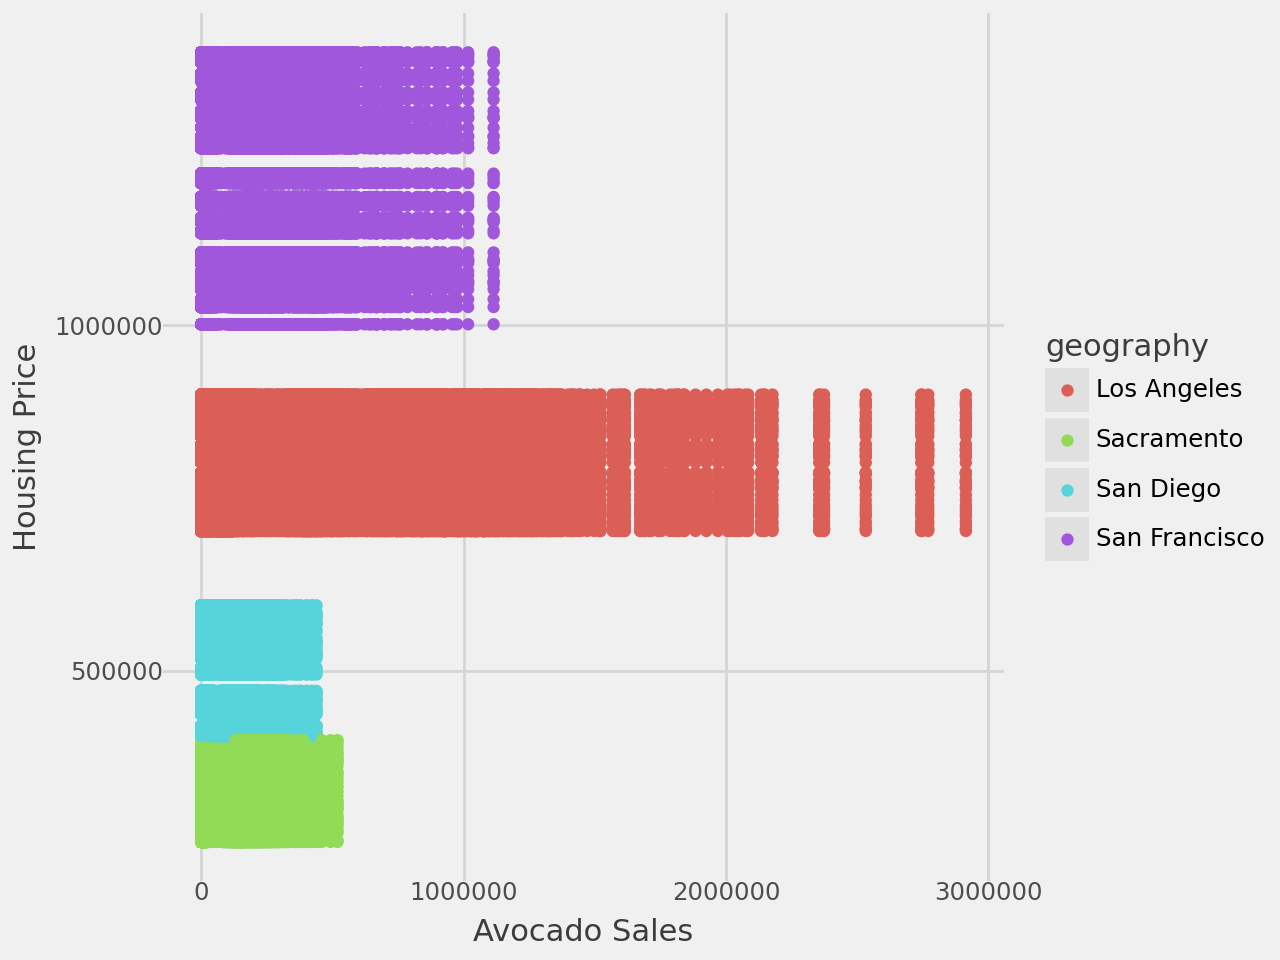

In [42]:
# Gallery, lines
(
    ggplot(cali_inner, aes(x="sales", y="Price", color="geography"))
    + geom_point()
    + xlab('Avocado Sales')
    + ylab('Housing Price')
    + theme_538()
)


From the randomly generated houring prices we see that this claim that millenials can't afford houses because of avocado prices/sales is 'false' in this random dataset. This is true because we see that even though San Francisco has higher housing prices than Los Angeles, LA still has more avocado sales if the hypothesis was true this would be the opposite.